# Python版本：3.6  64-bit
# 机器学习库：scikit-learn  0.20.3
# 数据可视化：matplotlib    3.0.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#获取csv文件的函数
def get_csv(file_name):
    path = "C:/my python/titanic/"  #路径
    file_name = file_name
    full_path = path + file_name
    a = pd.read_csv(full_path)
    return a

In [5]:
tc_train = get_csv('train.csv')
tc_test = get_csv('test.csv')

In [6]:
tc_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color=red>观察数据：</font>

In [4]:
tc_train.info()    #缺失项：Age、Cabin、Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
tc_test.info()   #缺失项：Age、Fare、Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
tc_train.describe()  #获救率0.38；1/2+ 的人都是第三等级的乘客；3/4的人都是40岁以下，算是中年；绝大多数人独自一人；票价差距很大

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
tc_train.describe(include = np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jenkin, Mr. Stephen Curnow",male,347082,B96 B98,S
freq,1,577,7,4,644


# 绘图

In [7]:
#解决中文字符问题
from matplotlib.font_manager import FontProperties

In [8]:
#设置字体为黑体常规
font = FontProperties(fname = 'C:/Windows/fonts/simhei.ttf',size = 15)

Text(0, 0.5, '人数')

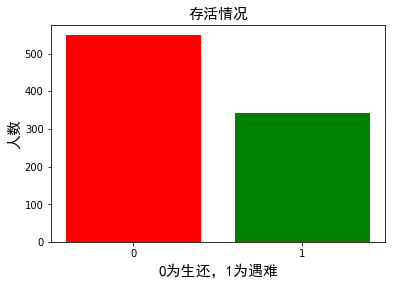

In [9]:
#存活情况柱状图
people_sum = tc_train.Survived.value_counts()
plt.bar([0,1],[people_sum[0],people_sum[1]],color = ['red','green'])
plt.xticks([0,1],[r'0',r'1'])
plt.title(u'存活情况',fontproperties = font)
plt.xlabel(u'0为生还，1为遇难',fontproperties = font)
plt.ylabel(u'人数',fontproperties = font)

Text(0.5, 1.0, '各等级人数分布及存活情况')

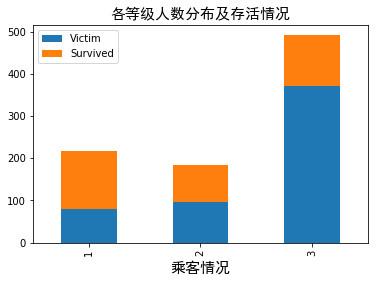

In [11]:
#各等级人数
survived_0 = tc_train.Pclass[tc_train['Survived']==0].value_counts()
survived_1 = tc_train.Pclass[tc_train['Survived']==1].value_counts()
df = pd.DataFrame({u'Victim':survived_0,u'Survived':survived_1})
df.plot(kind = 'bar',stacked = True)
plt.xlabel(u'乘客情况',fontproperties = font)
plt.title(u'各等级人数分布及存活情况',fontproperties = font)

Text(0.5, 1.0, '各等级人数分布')

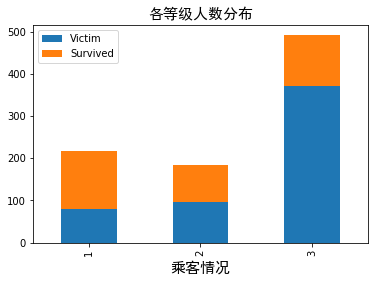

In [12]:
#各等级人数
survived_0 = tc_train.Pclass[tc_train['Survived']==0].value_counts()
survived_1 = tc_train.Pclass[tc_train['Survived']==1].value_counts()
df = pd.DataFrame({u'Victim':survived_0,u'Survived':survived_1})
df.plot(kind = 'bar',stacked = True)
plt.xlabel(u'乘客情况',fontproperties = font)
plt.title(u'各等级人数分布',fontproperties = font)

Text(0, 0.5, '人数')

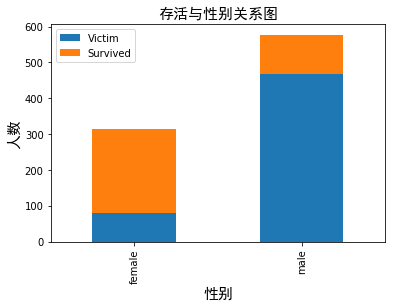

In [13]:
sur_0 = tc_train.Sex[tc_train.Survived == 0].value_counts()
sur_1 = tc_train.Sex[tc_train.Survived == 1].value_counts()

df_1 = pd.DataFrame({u'Victim':sur_0,u'Survived':sur_1})
df_1.plot(kind = 'bar',stacked = True)
plt.title(u'存活与性别关系图',fontproperties = font)
plt.xlabel(u'性别',fontproperties = font)
plt.ylabel(u'人数',fontproperties = font)

Text(0.5, 1.0, '等级1获救情况与性别关系')

<Figure size 432x288 with 0 Axes>

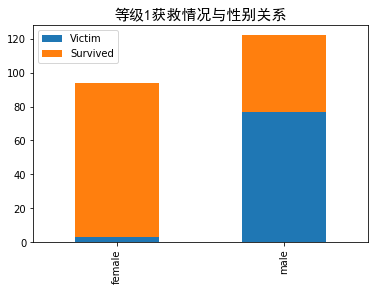

In [14]:
#各等级存活情况与性别

fig = plt.figure()
fig.set(alpha = 0.2)

pc_1 = tc_train.loc[tc_train.Pclass == 1]
pc_2 = tc_train.loc[tc_train.Pclass == 2]
pc_3 = tc_train.loc[tc_train.Pclass == 3]

pc_1_sur0 = pc_1.Sex[pc_1['Survived']==0].value_counts()
pc_1_sur1 = pc_1.Sex[pc_1['Survived']==1].value_counts()
df = pd.DataFrame({u'Victim':pc_1_sur0,u'Survived':pc_1_sur1})
df.plot(kind = 'bar',stacked = True)
plt.title(u'等级1获救情况与性别关系',fontproperties = font)

Text(0.5, 1.0, '等级2获救情况与性别关系')

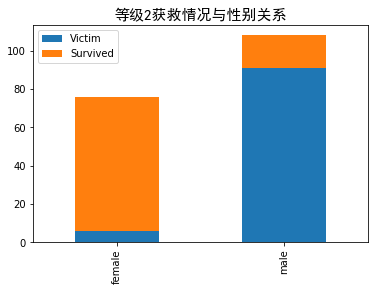

In [15]:
pc_2_sur0 = pc_2.Sex[pc_2['Survived']==0].value_counts()
pc_2_sur1 = pc_2.Sex[pc_2['Survived']==1].value_counts()
df = pd.DataFrame({u'Victim':pc_2_sur0,u'Survived':pc_2_sur1})
df.plot(kind = 'bar',stacked = True)
plt.title(u'等级2获救情况与性别关系',fontproperties = font)

Text(0.5, 1.0, '等级3获救情况与性别关系')

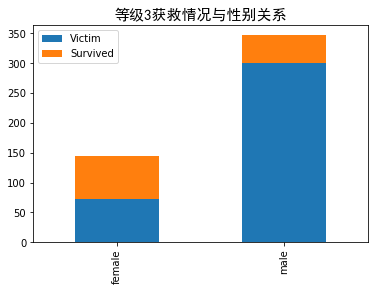

In [16]:
pc_3_sur0 = pc_3.Sex[pc_3['Survived']==0].value_counts()
pc_3_sur1 = pc_3.Sex[pc_3['Survived']==1].value_counts()
df = pd.DataFrame({u'Victim':pc_3_sur0,u'Survived':pc_3_sur1})
df.plot(kind = 'bar',stacked = True)
plt.title(u'等级3获救情况与性别关系',fontproperties = font)

Text(0.5, 0, '票价')

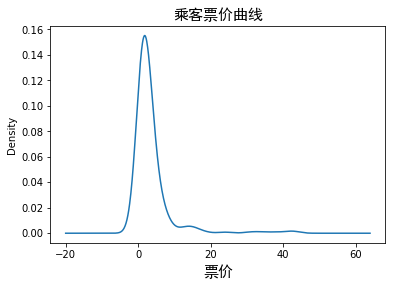

In [17]:
tc_train.Fare.value_counts().plot(kind = 'kde')
plt.title(u'乘客票价曲线',fontproperties = font)
plt.xlabel(u'票价',fontproperties = font)

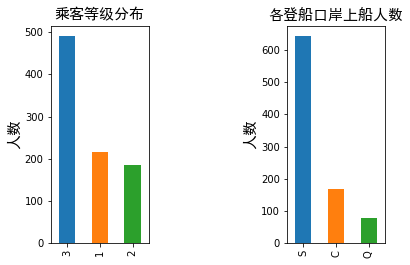

In [19]:
fig = plt.figure()
fig.set(alpha = 0.2)  #设定图表颜色alpha（透明的）参数属性


plt.subplot2grid((1,3),(0,0))                     #将画布分为三块
tc_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数",fontproperties = font)
plt.title(u"乘客等级分布",fontproperties = font)

plt.subplot2grid((1,3),(0,2))
tc_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数",fontproperties = font)
plt.ylabel(u"人数",fontproperties = font)
plt.show()

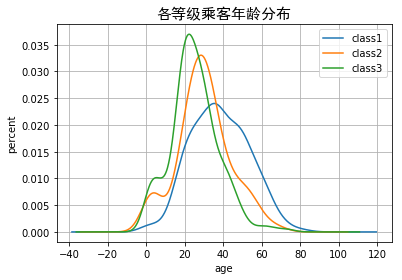

In [14]:
#分析各等级乘客年龄的分布情况

plt.figure()
tc_train.loc[tc_train.Pclass==1,'Age'].plot(kind = 'kde')
tc_train.loc[tc_train.Pclass==2,'Age'].plot(kind = 'kde')
tc_train.loc[tc_train.Pclass==3,'Age'].plot(kind = 'kde')
plt.title(u'各等级乘客年龄分布',fontproperties = font)
plt.xlabel(u'age')
plt.ylabel(u'percent')
plt.legend([u'class1',u'class2',u'class3'],loc = 'best')
plt.grid()#显示网格线

Text(0, 0.5, '人数')

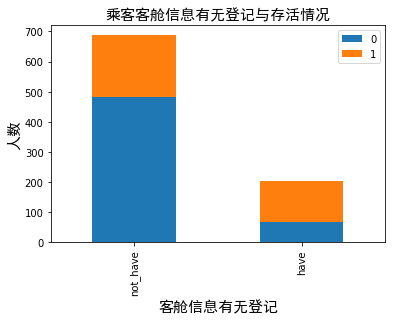

In [12]:
Cabin_nothave = tc_train.Survived[tc_train.Cabin.isnull()==True].value_counts()
Cabin_have = tc_train.Survived[tc_train.Cabin.isnull()==False].value_counts()
df = pd.DataFrame({"not_have":Cabin_nothave,"have":Cabin_have}).T
df.plot(kind = 'bar',stacked = True)
plt.title("乘客客舱信息有无登记与存活情况",fontproperties = font)
plt.xlabel("客舱信息有无登记",fontproperties = font)
plt.ylabel("人数",fontproperties = font)

Text(0, 0.5, '人数')

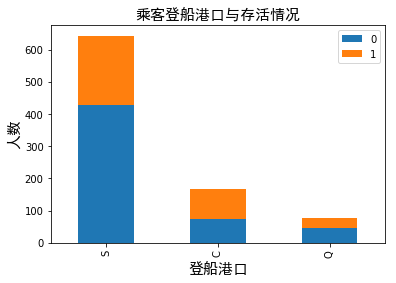

In [13]:
Embarked_S = tc_train.Survived[tc_train.Embarked.values=='S'].value_counts()
Embarked_C = tc_train.Survived[tc_train.Embarked.values=='C'].value_counts()
Embarked_Q = tc_train.Survived[tc_train.Embarked.values=='Q'].value_counts()

df = pd.DataFrame({"S":Embarked_S,"C":Embarked_C,"Q":Embarked_Q}).T
df.plot(kind = 'bar',stacked = True)
plt.title("乘客登船港口与存活情况",fontproperties = font)
plt.xlabel("登船港口",fontproperties = font)
plt.ylabel("人数",fontproperties = font)

<font color=red>下面是第一次提交的内容：</font>

# 填补年龄缺失

In [8]:
from sklearn.ensemble import RandomForestRegressor

def set_miss_age(df):
    
    #将已有数值型数据填入随机森林
    age_df = df[['Age','Pclass','Fare','SibSp','Parch']]
    
    #将年龄分为已知年龄和未知年龄
    known_age = age_df[age_df.Age.notnull()].as_matrix()    #最新版本中as_matrix()用values代替，values无()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()   #as_matrix()用法及作用，pandas中根据True和False选取数据方法
    
    #目标年龄
    y = known_age[:,0]
    #预测条件
    X = known_age[:,1:]
    
    #建立模型
    rfr = RandomForestRegressor(random_state = 0,n_estimators = 200,n_jobs = 1)
    rfr.fit(X,y)
    
    #预测条件
    predict_ages_massage = unknown_age[:,1:]
    
    #进行预测
    predict_ages_get = rfr.predict(predict_ages_massage)
    
    #用得到的年龄填补空缺
    df.loc[(df.Age.isnull()),'Age'] = predict_ages_get
    
    return df,rfr

#将Cabin分为登记与未登记(Yes,No)
def change_Cabin(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df

tc_train,rfr = set_miss_age(tc_train)
tc_train = change_Cabin(tc_train)

C:\my python\ANACONDA\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\my python\ANACONDA\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [9]:
#将Cabin等列展开为多列 会用到get_dummies方法(独热)
def change_values_ob(df):
    dummies_Cabin = pd.get_dummies(df.Cabin,prefix = "Cabin")
    dummies_Sex = pd.get_dummies(df.Sex,prefix = "Sex")
    dummies_Embarked = pd.get_dummies(df.Embarked,prefix = "Embarked")
    dummies_Pclass = pd.get_dummies(df.Pclass,prefix = "Pclass")
    df = pd.concat([df,dummies_Cabin,dummies_Sex,dummies_Embarked,dummies_Pclass],axis = 1)
    df.drop(['Cabin','Sex','Embarked','Pclass','Ticket','Name'],axis = 1,inplace = True)
    return df   

In [10]:
tc_train = change_values_ob(tc_train)  

In [11]:
tc_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,1,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,1,0,0,0,1,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,1,0,0,1,0,0,1


# 改变年龄、费用的值

In [12]:
import sklearn.preprocessing as perprocessing

#将Age、Fare数值预处理，使其变换幅度缩小
def change_age_fare(df):
    scaler = perprocessing.StandardScaler()    #StandardScaler通过删除均值和缩放到单位方差来标准化特征
    age_scaler_param = scaler.fit(df['Age'].values.reshape(-1,1))        #要将数据转变乘shape为(-1,1)的数组才能进行处理
    df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1),age_scaler_param)#df['Age_scaled'] = age_scaler_param.transfrom(df['Age'].values.reshape(-1,1))
    fare_scaler_param = scaler.fit(df['Fare'].values.reshape(-1,1))
    df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1),fare_scaler_param)
    return df

In [13]:
tc_train = change_age_fare(tc_train)

In [14]:
tc_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,1,-0.561727,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,1,0,0,1,0,0,0.612395,0.786845
2,3,1,26.0,0,0,7.9250,1,0,1,0,0,0,1,0,0,1,-0.268196,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,1,0,0,0,1,1,0,0,0.392247,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,1,0,0,1,0,0,1,0.392247,-0.486337


# 建立模型

<font color = red>使用逻辑回归模型</font>

In [18]:
from sklearn import linear_model

#正则选取需要的数据
train_df = tc_train.filter(regex = 'Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Sex_.*|Embarked_.*|Pclass_.*')
train_np = train_df.values

#y 即目标结果Survived
y = train_np[:,0]

#X 即预测的依据
X = train_np[:,1:]

clf = linear_model.LogisticRegression(C = 1.0,penalty = 'l1',tol = 1e-6)
clf.fit(X,y)  #进行训练

clf

C:\my python\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False)

In [16]:
tc_test = get_csv('test.csv')
tc_test.loc[(tc_test.Fare.isnull()),'Fare'] = 0  #用0填充Fare的空缺值
tc_test,rfr_0 = set_miss_age(tc_test)#设置年龄缺失
tc_test = change_Cabin(tc_test)#设置Cabin
tc_test = change_values_ob(tc_test)#设置object，将其展开
tc_test = change_age_fare(tc_test)#设置年龄、费用的值

C:\my python\ANACONDA\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\my python\ANACONDA\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [17]:
tc_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,1,0,0,0,1,0.368144,-0.496637
1,893,47.0,1,0,7.0000,1,0,1,0,0,0,1,0,0,1,1.332885,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,1,0,0,1,0,2.490574,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,1,0,0,1,0,0,1,-0.210700,-0.481704
4,896,22.0,1,1,12.2875,1,0,1,0,0,0,1,0,0,1,-0.596597,-0.416740


In [18]:
test_df = tc_test.filter(regex = 'Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Sex_.*|Embarked_.*|Pclass_.*')
result = clf.predict(test_df)  #进行预测

In [19]:
resule_file = pd.DataFrame({"PassengerId":tc_test.PassengerId.values,"Survived":result.astype(np.int32)})

In [20]:
resule_file.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [21]:
resule_file.to_csv("C:/my python/titanic/logistic_regression_predictions.csv",index = False)

In [22]:
#模型系数关联分析
pd.DataFrame({"columns":list(train_df.columns[1:]),"coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.3432415056355388]
1,Parch,[-0.10562120185553536]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.903254577252357]
4,Sex_female,[1.9553502952255177]
5,Sex_male,[-0.6782095929507083]
6,Embarked_C,[0.0]
7,Embarked_Q,[0.0]
8,Embarked_S,[-0.41670501255145936]
9,Pclass_1,[0.3367966892587469]


# 交叉验证

<font color = red>用训练集中的数据拆开分别作为新的训练集和测试集进行验证打分，多次重复</font>

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
clf = linear_model.LogisticRegression(C = 1.0,penalty = 'l1',tol = 1e-6)

In [26]:
all_train_df = tc_train.filter(regex = 'Survived|SibSp|Parch|Age_.*|Fare_.*|Cabin_.*|Sex_.*|Embarked_*|Pclass_.*')
X = all_train_df.values[:,1:]
y = all_train_df.values[:,0]
print(cross_val_score(clf,X,y,cv = 5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


C:\my python\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\my python\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\my python\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\my python\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\my python\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

# bad case人工审查 

<font color = red>将训练集按7：3的比例拆分为训练集和测试集进行测试，可以得到模型预测错误的数据，观察预测错误的数据</font>

In [27]:
from sklearn.model_selection import train_test_split      #train_test_split对数据进行分割

In [28]:
split_train,split_cv = train_test_split(tc_train,test_size = 0.7,random_state = 0)
train_df = split_train.filter(regex = 'Survived|Age_.*|SibSp|Parch|Fare_*|Cabin_.*|Sex_.*|Embarked_.*|Pclass_.*')

In [29]:
clf = linear_model.LogisticRegression(C = 1.0,penalty = 'l1',tol = 1e-6)
clf.fit(train_df.values[:,1:],train_df.values[:,0])
cv_df = split_cv.filter(regex = 'Survived|Age_.*|SibSp|Parch|Fare_*|Cabin_.*|Sex_.*|Embarked_.*|Pclass_.*')
predictions_cv = clf.predict(cv_df.values[:,1:])

orgin_csv = get_csv('train.csv')

C:\my python\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
bad_case = orgin_csv.loc[orgin_csv['PassengerId'].isin(split_cv[predictions_cv != cv_df.values[:,0]]['PassengerId'].values)]#pandas中.loc中，用[True or False][clumns]选取

In [31]:
bad_case.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S


# 对结果打分

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(split_cv.Survived.values,predictions_cv))

0.7884615384615384


<font color = pink>结果比kaggle上的打分0.77511高</font>

<font color = red>下面是第二次提交过程代码</font>

In [22]:
tc_train = get_csv('train.csv')

# 将名字的title单独列出

In [23]:
def title(df):
    #列出名字中的title
    df['Title'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0])
    
    df = df.drop('Name',axis = 1)
    
    return df

In [24]:
tc_train = title(tc_train)

In [8]:
tc_train.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Capt              1
 Sir               1
 Mme               1
 Ms                1
 Jonkheer          1
 Don               1
 Lady              1
 the Countess      1
Name: Title, dtype: int64

In [36]:
tc_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


# family成员数量，分为大家族、小家族

In [25]:
def family(df):
    
    #每个家庭的总人数
    df['Family_sum'] = df.SibSp.values+df.Parch.values+1
    
    #根据人数分为大家庭、小家庭
    df.loc[df.Family_sum.values < 2,'FamilySize'] = 'small'
    df.loc[(df.Family_sum.values >= 2 )&(df.Family_sum.values <= 4),'FamilySize'] = 'mid'
    df.loc[df.Family_sum.values >4,'FamilySize'] = 'big'
    
    df = df.drop(['SibSp','Parch','Family_sum'],axis = 1)
    
    return df

In [26]:
tc_train = family(tc_train)

In [39]:
tc_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,mid
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,mid
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,small
3,4,1,1,female,35.0,113803,53.1000,C123,S,Mrs,mid
4,5,0,3,male,35.0,373450,8.0500,NaN,S,Mr,small


# 根据年龄的中位数填充年龄缺失值

In [27]:
def age(df):
    
    #填补年龄空缺
    df.loc[df.Age.isnull() == True,'Age'] = np.median(df['Age'].dropna())
    
    #将年龄分段
    df.loc[df.Age.values <= 12,'AgeCat'] = 'child'
    df.loc[(df.Age.values > 12)&(df.Age.values <= 28),'AgeCat'] = 'adult'
    df.loc[(df.Age.values > 28)&(df.Age.values <= 60),'AgeCat'] = 'senior'
    df.loc[df.Age.values >60,'AgeCat'] = 'aged'
    
    df = df.drop('Age',axis = 1)
    
    return(df)

In [28]:
tc_train = age(tc_train)

In [42]:
tc_train.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Title,FamilySize,AgeCat
0,1,0,3,male,A/5 21171,7.2500,NaN,S,Mr,mid,adult
1,2,1,1,female,PC 17599,71.2833,C85,C,Mrs,mid,senior
2,3,1,3,female,STON/O2. 3101282,7.9250,NaN,S,Miss,small,adult
3,4,1,1,female,113803,53.1000,C123,S,Mrs,mid,senior
4,5,0,3,male,373450,8.0500,NaN,S,Mr,small,senior


# 根据Fare缺失者等级的中位数填补Fare的空缺

In [29]:
def fare(df):
    
    #填补空缺值
    df.loc[(df.Fare.isnull() == True)&(df.Pclass == 1),'Fare'] = np.median(df[df['Pclass'] == 1]['Fare'].dropna()) 
    df.loc[(df.Fare.isnull() == True)&(df.Pclass == 2),'Fare'] = np.median(df[df['Pclass'] == 2]['Fare'].dropna())
    df.loc[(df.Fare.isnull() == True)&(df.Pclass == 3),'Fare'] = np.median(df[df['Pclass'] == 3]['Fare'].dropna())
    
    #将票价分为高中低三个等级
    df.loc[df.Fare.values <= 10,'HighLow'] = 'Low'
    df.loc[(df.Fare.values > 10)&(df.Fare.values <= 50),'HighLow'] = 'Mid'
    df.loc[df.Fare.values >50,'HighLow'] = 'High'
    
    df = df.drop('Fare',axis = 1)
    
    return df

In [30]:
tc_train = fare(tc_train)

In [45]:
tc_train.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,FamilySize,AgeCat,HighLow
0,1,0,3,male,A/5 21171,NaN,S,Mr,mid,adult,Low
1,2,1,1,female,PC 17599,C85,C,Mrs,mid,senior,High
2,3,1,3,female,STON/O2. 3101282,NaN,S,Miss,small,adult,Low
3,4,1,1,female,113803,C123,S,Mrs,mid,senior,High
4,5,0,3,male,373450,NaN,S,Mr,small,senior,Low


# Cabin是否存在

In [31]:
def cabin(df):
    
    df.loc[df.Cabin.notnull(),'Cabin'] = 'Yes'
    df.loc[df.Cabin.isnull(),'Cabin'] = 'No'
    
    return df

In [32]:
tc_train = cabin(tc_train)

In [48]:
tc_train.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,FamilySize,AgeCat,HighLow
0,1,0,3,male,A/5 21171,No,S,Mr,mid,adult,Low
1,2,1,1,female,PC 17599,Yes,C,Mrs,mid,senior,High
2,3,1,3,female,STON/O2. 3101282,No,S,Miss,small,adult,Low
3,4,1,1,female,113803,Yes,S,Mrs,mid,senior,High
4,5,0,3,male,373450,No,S,Mr,small,senior,Low


In [49]:
tc_train.Cabin.describe()

count     891
unique      2
top        No
freq      687
Name: Cabin, dtype: object

# 用Embarked的众数S填补空缺

In [33]:
def embarked(df):
    
    df.loc[df.Embarked.isnull(),'Embarked'] = 'S'
    
    return df

In [34]:
tc_train = embarked(tc_train)

In [52]:
tc_train.head()

,PassengerId,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,FamilySize,AgeCat,HighLow
0,1,0,3,male,A/5 21171,No,S,Mr,mid,adult,Low
1,2,1,1,female,PC 17599,Yes,C,Mrs,mid,senior,High
2,3,1,3,female,STON/O2. 3101282,No,S,Miss,small,adult,Low
3,4,1,1,female,113803,Yes,S,Mrs,mid,senior,High
4,5,0,3,male,373450,No,S,Mr,small,senior,Low


# 所有数据离散化后进行独热处理

In [35]:
def one_hot(df):
    
    dummies_Pclass = pd.get_dummies(df.Pclass,prefix = 'Pclass')
    dummies_Sex = pd.get_dummies(df.Sex,prefix = 'Sex')
    dummies_Embarked = pd.get_dummies(df.Embarked,prefix = 'Embarked')
    dummies_Title = pd.get_dummies(df.Title,prefix = 'Title')
    dummies_FamilySize = pd.get_dummies(df.FamilySize,prefix = 'FamilySize')
    dummies_AgeCat = pd.get_dummies(df.AgeCat,prefix = 'AgeCat')
    dummies_HighLow = pd.get_dummies(df.HighLow,prefix = 'HighLow')
    dummies_Cabin = pd.get_dummies(df.Cabin,prefix = 'Cabin')
    
    df = pd.concat([df,dummies_Pclass,dummies_Sex,dummies_Embarked,dummies_Title,dummies_FamilySize,dummies_AgeCat,dummies_HighLow,dummies_Cabin],axis = 1)
    
    #将不需要的列移除
    df = df.drop(['Pclass','Sex','Ticket','Cabin','Embarked','Title','FamilySize','AgeCat','HighLow'],axis = 1)
    
    return df

In [36]:
tc_train = one_hot(tc_train)

In [37]:
tc_train = tc_train.drop(['Title_ Dr','Title_ Rev','Title_ Mlle','Title_ Major','Title_ Col','Title_ Ms','Title_ Jonkheer','Title_ Mme','Title_ Lady','Title_ Don','Title_ the Countess','Title_ Capt','Title_ Sir'],axis = 1)

In [56]:
print(tc_train.loc[:,'Embarked_Q':'FamilySize_big'].head())

   Embarked_Q  Embarked_S  Title_ Master  Title_ Miss  Title_ Mr  Title_ Mrs  \
0           0           1              0            0          1           0   
1           0           0              0            0          0           1   
2           0           1              0            1          0           0   
3           0           1              0            0          0           1   
4           0           1              0            0          1           0   

   FamilySize_big  
0               0  
1               0  
2               0  
3               0  
4               0  


# 数据处理的总函数

In [38]:
#数据清洗
def clean_and_munge_data(df):
    df = title(df)          #将名字中的title取出
    df = family(df)         #家庭大小
    df = age(df)            #填补年龄缺失，将年龄离散，分为四段
    df = fare(df)           #填补fare缺失值，根据所在等级fare的中位数
    df = cabin(df)          #根据Cabin是否存在
    df = embarked(df)       #将Embarked的缺失值用S填充
    df = one_hot(df)        #独热处理
    return df

In [39]:
tc_test = get_csv('test.csv')

In [40]:
tc_test = clean_and_munge_data(tc_test)
tc_test = tc_test.drop(['Title_ Dr','Title_ Rev','Title_ Col','Title_ Ms','Title_ Dona'],axis = 1)

In [60]:
tc_test.head()

,PassengerId,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,...,FamilySize_small,AgeCat_adult,AgeCat_aged,AgeCat_child,AgeCat_senior,HighLow_High,HighLow_Low,HighLow_Mid,Cabin_No,Cabin_Yes
0,892,0,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,893,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,894,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
3,895,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,1,0
4,896,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


# 模型融合预测

In [42]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.ensemble import VotingClassifier        #多数规则分类器
from sklearn.svm import SVC                          #支持向量机

def predict(train,test):
    #将数据提取，转换为ndarray的纯数据
    train_df = train.filter(regex = 'Survived|Sex_.*|Pclass_.*|Cabin_log_y_n|Title_.*|FamilySize_.*|Embarked_.*|AgeCat_.*|HighLow_.*')
    train_np = train_df.values
    test_df = test.filter(regex = 'Sex_.*|Pclass_.*|Cabin_log_y_n|Title_.*|FamilySize_.*|Embarked_.*|AgeCat_.*|HighLow_.*')
    test_np = test_df.values
    
    #X、y,X:预测条件；y:预测结果
    X = train_np[:,1:]
    y = train_np[:,0]
    
    #模型：逻辑回归、随机森林
    lr = linear_model.LogisticRegression(C = 1.0,penalty = 'l1',tol = 1e-6)
    rfr = RandomForestClassifier(n_estimators = 200,criterion = 'entropy')
    svc = SVC(C = 2,kernel = 'poly')
    clf = VotingClassifier(estimators = [('lr',lr),('rfr',rfr),('svc',svc)])
    clf = clf.fit(X,y)
    
    predictions = clf.predict(test_np)
    
    return predictions,clf

In [43]:
def save_result(df,predict):
    result = pd.DataFrame({'PassengerId':df['PassengerId'].values,"Survived":predict.astype(np.int32)})
    result.to_csv("C:/my python/titanic/Logistic_Regression_predictions_2.csv",index = False)

In [44]:
predictions,clf = predict(tc_train,tc_test)
save_result(tc_test,predictions)

C:\my python\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\my python\ANACONDA\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<font color = red>这次的结果得分为0.78947，感觉还是特征工程做的不够</font>

<font color = blue>参考博客：1、http://blog.csdn.net/han_xiaoyang/article/details/49797143;
    2、https://blog.csdn.net/cqy_chen/article/details/78783645</font>

<font color = black></font>